# Manuel Alonso, Emiliano Trueba y Antonio Andere

In [1]:
import numpy as np  # Para cálculos numéricos en Python.
import pandas as pd  #  Para el manejo de datos en Python.
import matplotlib.pyplot as plt  # Visualización de datos en Python.
import seaborn as sns  # Viene de Mathplot
import math


In [2]:
# Inicio Pregunta 1
# Importamos los documentos del drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Sacamos el documento precios_muestra y leomas su csv.
r=pd.read_csv("/content/drive/MyDrive/precios_muestra.csv")
# A través de la función pct.change() calculamos los rendimientos
rendimientos_r=r.pct_change().dropna()

rendimientos_r


,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [4]:
# Con la función mean sacamos la media
media_r=rendimientos_r.mean()
media_r

BLUE      0.01
ORANGE    0.01
dtype: float64

In [5]:
# Con la función std() calculamos la desviacón estandar
desviación_r=rendimientos_r.std()
desviación_r
# Final pregunta 1

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [6]:
# Pregunta 2
# Calculamos el rendimiento compuesto con la siguiente formula (usando la función prod() para la multiplicación)
rend_compuesto= (rendimientos_r+1).prod()-1
rend_compuesto


BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [7]:
# Pregunta 3
# Anualizamos diferentes rendimientos son diferentes periodos y tasas, con la función a continuación.
def anualiza_rendimientos(periodo, num_periodos):
  return (1 + periodo)**num_periodos - 1 #Es la función con las que se calcularan
# Damos las tasas a anualizar, asi como los periodos
mensual = 0.01
periodos_mensual = 12
trimestral = 0.04
periodos_trimestres = 4
diario = 0.0001
periodos_diario = 252

# Ahorasi metemos estas tasas y periodos a la función anualiza_rendimientos
rendimiento_anualizado_mensual=anualiza_rendimientos(mensual, periodos_mensual)
rendimiento_anualizado_trimestral=anualiza_rendimientos(trimestral,periodos_trimestres)
rendimiento_anualizado_diario=anualiza_rendimientos(diario, periodos_diario)

#Mostramos las respuestas con  la función print (podriamos mostrar una sola respuesta solo poniendo el nombre, pero aqui como son 4 usamos print)
print(f'Rendimiento mesual anualizad: {rendimiento_anualizado_mensual:.4f}')
print(f'Rendimiento trimestral anualizado: {rendimiento_anualizado_trimestral:.4f}')
print(f'Rendimiento diario anualizado: {rendimiento_anualizado_diario:.6f}')

Rendimiento mesual anualizad: 0.1268
Rendimiento trimestral anualizado: 0.1699
Rendimiento diario anualizado: 0.025519


In [8]:
# Pregunta 4

# Nos inventamos una volatilidad mensual razonable para anualizarla
volatilidad=0.04
periodos=12

#La anualizamos metiendole raiz de 12
volatilidad_anual_mensual = volatilidad * math.sqrt(periodos)

volatilidad_anual_mensual

0.13856406460551018

In [9]:
#Pregunta 5
from datetime import datetime
import yfinance as yf

class Asset:
    def __init__(self, ticker, start_date, end_date=datetime.today().strftime('%Y-%m-%d')):
      # Inicializa una instancia de la clase Asset.

        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.data = self.get_data()  # Descargar los datos al instanciar la clase

    def get_data(self):

        #Descarga los datos financieros del activo desde Yahoo Finance.

       # Nos regresa un DataFrame con los datos descargados.

        df = yf.download(self.ticker, start=self.start_date, end=self.end_date)
        return df

    def simple_returns(self, adj=False, cum=False):

       # Se calculan los rendimientos simples del activo.

        if adj:
            simple_returns = self.data["Adj Close"].pct_change().dropna()
        else:
            simple_returns = self.data["Close"].pct_change().dropna()
        if cum:
            simple_returns = (1 + simple_returns).cumprod() - 1
        return simple_returns

    def calculate_compound_return(self):
       #Se calcula el rendimiento compuesto del activo.


        simple_returns = self.simple_returns()
        compound_return = (1 + simple_returns).prod() - 1
        return compound_return

    def annualize_returns(self, rendimiento_periodo, periodos_por_ano):

       # Anualiza un rendimiento dado.

        return (1 + rendimiento_periodo) ** periodos_por_ano - 1


In [10]:
# Pregunta 6
import pandas as pd
import numpy as np

# Configurar la semilla aleatoria
np.random.seed(0)

# Generar 10 valores para "Stock A"
stock_a = 10
desvstock_a = 2
valstock_a = np.random.normal(stock_a, desvstock_a, 10)

# Generar 10 valores para "Stock B"
stock_b = 10
desvstock_b = 2
valstock_b = np.random.normal(stock_b, desvstock_b, 10)

# Crear un diccionario con las columnas
data = {
    'Stock A': valstock_a,
    'Stock B': valstock_b
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df)


     Stock A    Stock B
0  13.528105  10.288087
1  10.800314  12.908547
2  11.957476  11.522075
3  14.481786  10.243350
4  13.735116  10.887726
5   8.045444  10.667349
6  11.900177  12.988158
7   9.697286   9.589683
8   9.793562  10.626135
9  10.821197   8.291809


In [11]:
# Pregunta 7

#Calcular el rendimiento compuesto
rendstocks=df.pct_change().dropna()
compuesto_stocks = (rendstocks + 1).prod() - 1

# Imprimir el rendimiento compuesto
print("Rendimiento compuesto:", compuesto_stocks)

#Calcular la media de lso resultados
media_stocks=rendstocks.mean()
print("Media rendimientos:", media_stocks)

#Calcular la desviacion estandar de los resultados
desv_stocks=rendstocks.std()
print("Desviacion estandar rendimientos:", desv_stocks)


Rendimiento compuesto: Stock A   -0.200095
Stock B   -0.194038
dtype: float64
Media rendimientos: Stock A    0.006630
Stock B   -0.008523
dtype: float64
Desviacion estandar rendimientos: Stock A    0.261126
Stock B    0.183092
dtype: float64


In [12]:
# Pregunta 8
# Definir la tasa de cambio mensual de cada instrumento siendo -1% para "AA" y 1% para "BB"
tasa_aa = -0.01
tasa_bb = 0.01

# Inicializar los valores iniciales de los activos
valor_inicial_aa = 100  # Valor inicial de "AA"
valor_inicial_bb = 100  # Valor inicial de "BB"

# Calcular el valor de "AA" después de 12 meses
valor_aa = valor_inicial_aa
for _ in range(12):
    valor_aa = valor_aa * (1 + tasa_aa)

# Calcular el valor de "BB" después de 12 meses
valor_bb = valor_inicial_bb
for _ in range(12):
    valor_bb = valor_bb * (1 + tasa_bb)

# Calcular la variación porcentual
variacion_aa = (valor_aa - valor_inicial_aa) / valor_inicial_aa * 100
variacion_bb = (valor_bb - valor_inicial_bb) / valor_inicial_bb * 100

# Determinar cuál es más volátil
activo_mas_volatil = "AA" if variacion_aa < variacion_bb else "BB"

# Imprimir los resultados
print(f"Variación de AA: {variacion_aa:.2f}%")
print(f"Variación de BB: {variacion_bb:.2f}%")
print(f"El activo más volátil es: {activo_mas_volatil}")

tasa_bb = 0.01   # Ganancia del 1% por mes para "BB"

# Inicializar los valores iniciales de los activos "AA" y "BB"
valor_inicial_aa = 100
valor_inicial_bb = 100

# Calcular los valores de los instrumentos "AA" y "BB" después de 12 meses
valor_aa = valor_inicial_aa
for _ in range(12):
    valor_aa = valor_aa * (1 + tasa_aa)

valor_bb = valor_inicial_bb
for _ in range(12):
    valor_bb = valor_bb * (1 + tasa_bb)

# Calcular la variación porcentual de cada instrumento.
variacion_aa = (valor_aa - valor_inicial_aa) / valor_inicial_aa * 100
variacion_bb = (valor_bb - valor_inicial_bb) / valor_inicial_bb * 100

# Determinar cuál  de los dos instrumentos es más volátil
activo_mas_volatil = "AA" if variacion_aa < variacion_bb else "BB"

# Imprimir los variaciones de cada instrumento y cuál es el instrumento más volatil
print(f"Variación de AA: {variacion_aa:.2f}%")
print(f"Variación de BB: {variacion_bb:.2f}%")
print(f"El activo más volátil es: {activo_mas_volatil}")


Variación de AA: -11.36%
Variación de BB: 12.68%
El activo más volátil es: AA
Variación de AA: -11.36%
Variación de BB: 12.68%
El activo más volátil es: AA


[*********************100%%**********************]  3 of 3 completed
Resumen de estadísticas descriptivas de cada instrumento:
      Returns_AMZN   Returns_KO Returns_MSFT
                                            
count  2011.000000  2011.000000  2011.000000
mean      0.001241     0.000349     0.000849
std       0.019930     0.009066     0.014583
min      -0.126568    -0.060291    -0.113995
25%      -0.008189    -0.004399    -0.006559
50%       0.000966     0.000436     0.000384
75%       0.011624     0.005442     0.008062
max       0.157457     0.056872     0.104522


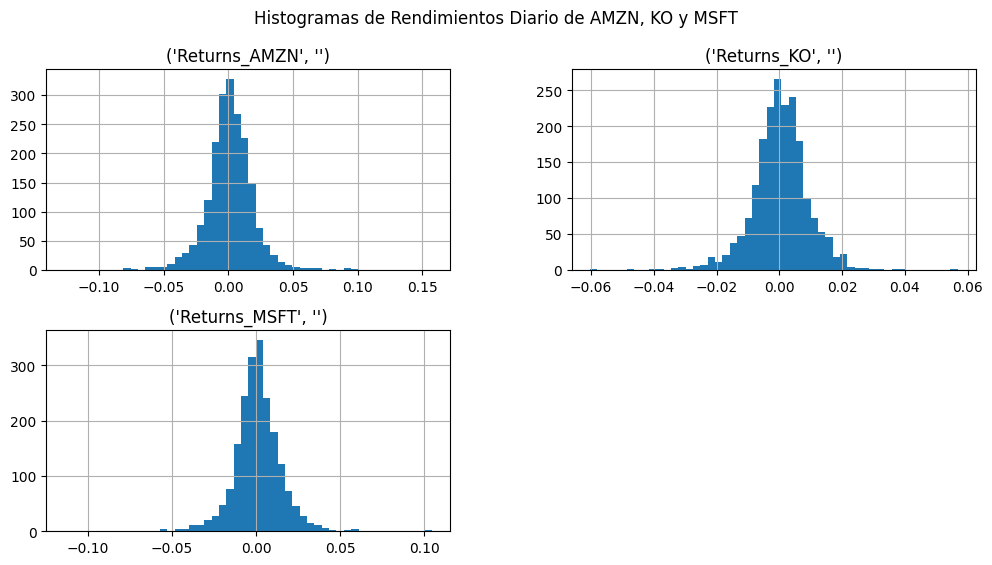

In [16]:
#Pregunta 9
#Importamos los módulos necesarios.
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos históricos de "AMZN", "KO" y "MSFT"
start_date = "2011-01-01"
end_date = "2019-01-01"
tickers = ["AMZN", "KO", "MSFT"]
data = yf.download(tickers, start=start_date, end=end_date)

# Calcular los rendimientos diarios de cada instrumento.
data["Returns_AMZN"] = data["Adj Close"]["AMZN"].pct_change()
data["Returns_KO"] = data["Adj Close"]["KO"].pct_change()
data["Returns_MSFT"] = data["Adj Close"]["MSFT"].pct_change()

# Realizamos el análisis financiero básico de los instrumentos.
print("Resumen de estadísticas descriptivas de cada instrumento:")
print(data[["Returns_AMZN", "Returns_KO", "Returns_MSFT"]].describe())

# Generamos los histogramas de los rendimientos de cada instrumento.
data[["Returns_AMZN", "Returns_KO", "Returns_MSFT"]].hist(bins=50, figsize=(12, 6))
plt.suptitle("Histogramas de Rendimientos Diario de AMZN, KO y MSFT")
plt.show()
# Se ve que casi todos los rendimientos han estado arriba del 1% y no hay tanta desviación estandar en ninguna inversión.

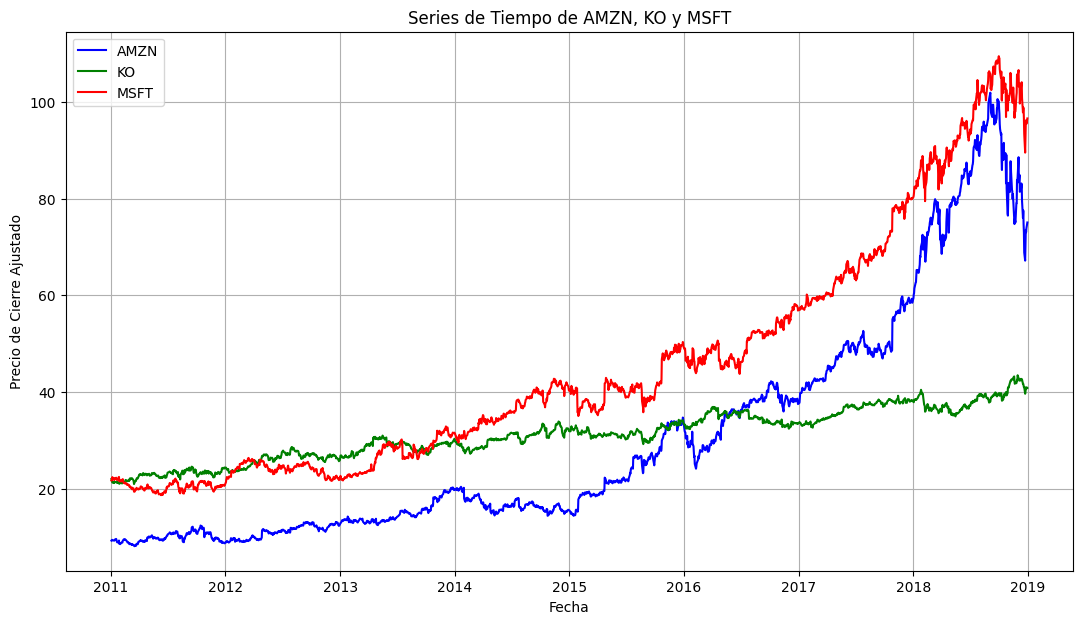

In [14]:
import matplotlib.pyplot as plt

# Gráficos de las series de tiempo
plt.figure(figsize=(13, 7))
plt.plot(data.index, data["Adj Close"]["AMZN"], label="AMZN", color="b")
plt.plot(data.index, data["Adj Close"]["KO"], label="KO", color="g")
plt.plot(data.index, data["Adj Close"]["MSFT"], label="MSFT", color="r")

# Configuración del gráfico que muestre los rendimientos de todos los instrumentos.
plt.title("Series de Tiempo de AMZN, KO y MSFT")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [15]:
# Nuestras conclusiones son que la acción con menos volatilidad es KO, pero es la que menos retorno ha tenido.
# Mientras que se ha podido ver una volatilidad muy parecida entre AMZN y MSFT, lo que ha ido de la mano con su rendimiento.